<a href="https://colab.research.google.com/github/Abstract-code-ops/ML-from-scratch/blob/main/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

SVMs are one of the most used methods in machine learning, mainly for classification tasks however they can be also be used for regression. They use Support Vector Classifiers (SVC) to classify objects into classes.

Let's first explore how an SVC works. Imagine we have a 2 dimentional graph with 2 different classes like the image below. An svc draws a line between the 2 edges of the classes as a thresh0ld to decide which class a new data resides in, the 2 edge values are called Support vectors and the distance between the line and the support vectors is called a margin. In this case the line is in the middle between the vectors and the margin of the 2 sides are equally largest as can be. This is called the maximal margin classifier.

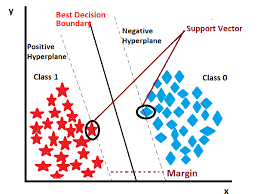



If there was an outlier of the red class that is close to the blue class the maximal margin classifier would have the decision boundary too close to blue and very far from red. this would misclassify alot of blue classes as red since the decision boundary use the outlier as a support vector. Another type of classifier is a soft margin classifier where it allows for misclassifications like an outlier but as a result have a more precise model. The goal of this classifier is to find out how many misclassifications it can allow to have the best decision boundary. This version is usually preferred over hard classififcation but ultimately it depends on the user whether they want to have more recall or precision.

Then we have a support vector machines, they apply kernel tricks into the support vector classifiers to be able to classsify non-linear data. There is the polynomial and rbf kernel where they have formulas to projects values to higher dimensions in order to extract more information

In [ ]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, scale
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# SVM from scratch

In [11]:
class svmClassifier():
  def __init__(self, lr=0.01, iters=100, lambdaParam=0.01): #added default values for iters and lambdaParam

    self.lr = lr
    self.iters = iters
    self.lambdaParam = lambdaParam

  def fit(self, X, y):

    self.n_samples, self.n_features = X.shape

    self.w = np.zeros(self.n_features)
    self.b = 0

    self.X = X
    self.y = y
    self.y_ = np.where(self.y <=0, -1, 1)

    for i in range(self.iters):
      self.gradientDescent()

  def gradientDescent(self):
    # this becomes a binary classifier for simplicity
    for idx, x in enumerate(self.X):
      condition = self.y_[idx] * (np.dot(x, self.w) - self.b) >= 1
      if condition:
        self.w -= self.lr * (2 * self.lambdaParam * self.w)
      else:
        self.w -= self.lr * (2 * self.lambdaParam * self.w - np.dot(x, self.y_[idx]))
        self.b -= self.lr * self.y_[idx]

  def predict(self, X):

    result = np.dot(X, self.w) - self.b
    pred_classes = np.sign(result)
    return pred_classes

In [12]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cls = svmClassifier()
cls.fit(X_train, y_train)
preds = cls.predict(X_test)

accuracy = np.sum(preds == y_test) / len(y_test)
print(accuracy)

0.5


# SVM Practice

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls')
column_names_row = df.iloc[0]
df.columns = column_names_row.values
df = df.iloc[1:]
df = df.reset_index(drop=True)
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.drop('ID', axis=1, inplace=True)
print(df.head())

  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
0     20000   2         2        1  24     2     2    -1    -1    -2  ...   
1    120000   2         2        2  26    -1     2     0     0     0  ...   
2     90000   2         2        2  34     0     0     0     0     0  ...   
3     50000   2         2        1  37     0     0     0     0     0  ...   
4     50000   1         2        1  57    -1     0    -1     0     0  ...   

  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
0         0         0         0        0      689        0        0        0   
1      3272      3455      3261        0     1000     1000     1000        0   
2     14331     14948     15549     1518     1500     1000     1000     1000   
3     28314     28959     29547     2000     2019     1200     1100     1069   
4     20940     19146     19131     2000    36681    10000     9000      689   

  PAY_AMT6 DEFAULT  
0        0       1  
1     2000    

In [ ]:
len(df.loc[(df.EDUCATION == 0) | (df.MARRIAGE == 0)])

68

In [ ]:
df_real = df.loc[(df.EDUCATION != 0) & (df.MARRIAGE != 0)]
len(df_real)

29932

In [ ]:
df_real.MARRIAGE.unique()

array([1, 2, 3], dtype=object)

In [ ]:
df_no_default = df_real.loc[df_real.DEFAULT == 0]
df_default = df_real.loc[df_real.DEFAULT == 1]

In [ ]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)
print(len(df_no_default_downsampled))

1000


In [ ]:
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)
print(len(df_default_downsampled))

1000


In [ ]:
df_downsampled = pd.concat([df_no_default_downsampled, df_default_downsampled])
print(len(df_downsampled))

2000


In [ ]:
X = df_downsampled.drop('DEFAULT', axis=1).copy()
y = df_downsampled['DEFAULT'].copy().astype(int)
print(X.shape)
print(y.head())

(2000, 23)
641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64


In [ ]:
column_transformer = ColumnTransformer([
                                        ('onehot', OneHotEncoder(), ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
                                        # ('standard', StandardScaler(), ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
                                       ]
                                       ,remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)
column_names = column_transformer.get_feature_names_out()
X_transformed = pd.DataFrame(X_transformed.toarray(), columns=column_names)
print(X_transformed.head())

   onehot__SEX_1  onehot__SEX_2  onehot__EDUCATION_1  onehot__EDUCATION_2  \
0            0.0            1.0                  0.0                  0.0   
1            1.0            0.0                  0.0                  0.0   
2            0.0            1.0                  0.0                  1.0   
3            0.0            1.0                  0.0                  1.0   
4            0.0            1.0                  0.0                  0.0   

   onehot__EDUCATION_3  onehot__EDUCATION_4  onehot__EDUCATION_5  \
0                  1.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   onehot__EDUCATION_6  onehot__MARRIAGE_1  onehot__MARRIAGE_2  ...  \
0                  0.0                 1.0               

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)
print(clf_svm)

SVC()


In [ ]:
predictions = clf_svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, predictions)

TN_RATIO: 78.80794701986756%
TP_RATIO: 58.38926174496645%


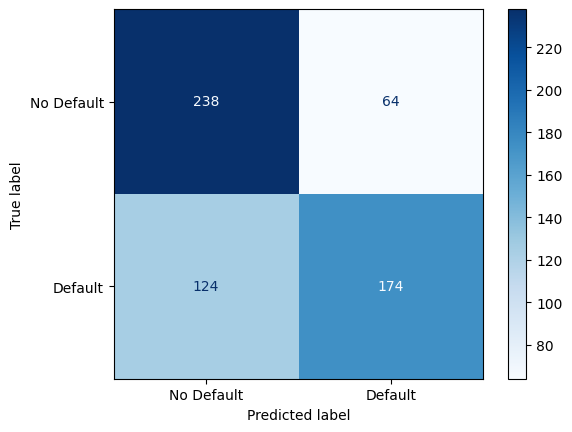

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])

TN_RATIO = cm[0,0] / (cm[0,0] + cm[0,1])
TP_RATIO = cm[1,1] / (cm[1,0] + cm[1,1])

print(f'TN_RATIO: {TN_RATIO*100}%')
print(f'TP_RATIO: {TP_RATIO*100}%')

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
param_grid = [
    {'kernel': ['rbf'],
     'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001]},
]

best_params = GridSearchCV(SVC(),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=0)
best_params.fit(X_train_scaled, y_train)
print(best_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print(best_params.best_estimator_)

SVC(C=1, gamma=0.01)


TN_RATIO: 78.80794701986756%
TP_RATIO: 57.38255033557047%


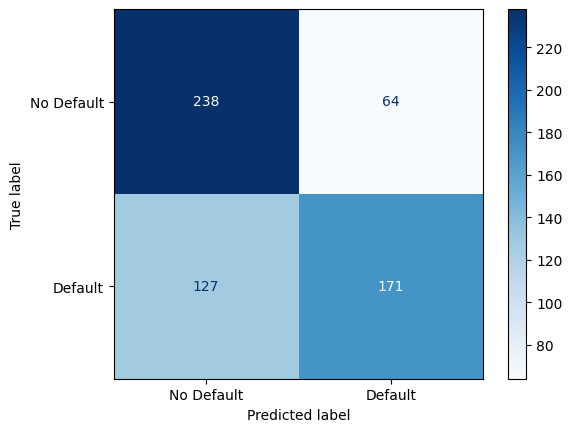

In [ ]:
best_clf = best_params.best_estimator_
best_clf.fit(X_train_scaled, y_train)

predictions = best_clf.predict(X_test_scaled)

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])

TN_RATIO = cm[0,0] / (cm[0,0] + cm[0,1])
TP_RATIO = cm[1,1] / (cm[1,0] + cm[1,1])

print(f'TN_RATIO: {TN_RATIO*100}%')
print(f'TP_RATIO: {TP_RATIO*100}%')

disp.plot(cmap=plt.cm.Blues)
plt.show()

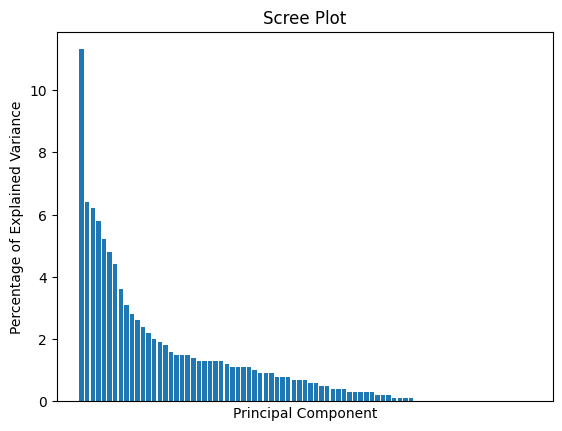

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
train_pc1_cords = X_train_pca[:,0]
train_pc2_cords = X_train_pca[:,1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after pca
## pc2 contains the y-axis coordinates of the data after pca
pca_train_scales = scale(np.column_stack((train_pc1_cords, train_pc2_cords)))

param_grid = [
    {'kernel': ['rbf'],
     'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001]},
]

best_params_pca = GridSearchCV(SVC(),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=0)
best_params_pca.fit(X_train_scaled, y_train)
print(best_params_pca.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
clf_pca = best_params_pca.best_estimator_
clf_pca.fit(pca_train_scales, y_train)

X_test_pca = pca.transform(X_test_scaled)
test_pc1_cords = X_test_pca[:,0]
test_pc2_cords = X_test_pca[:,1]

x_min = test_pc1_cords.min() - 1
x_max = test_pc1_cords.max() + 1

y_min = test_pc2_cords.min() - 1
y_max = test_pc2_cords.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z= clf_pca.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(test_pc1_cords, test_pc2_cords, c=y_test, alpha=0.7, s=100, edgecolors='k')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Support Vector Classifier with PCA')
plt.show()